# WATER POTABILITY PREDICTION USING DIFFERENT MODELS

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from imblearn.over_sampling import SMOTE # Minority oversampling(Balancing)

# Importing Models

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Scaling,perfomace,split and gridsearch imports

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,KFold,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay

# Importing data

In [34]:
df=pd.read_csv('../Datasets/water_potability.csv')

In [35]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [45]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

### Except target variable all other features are continuous features

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [38]:
# Converting the Potability column datatype to categorical column
df['Potability']=df['Potability'].astype('category')

## Checking null values

In [39]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [40]:
#Comparing Statistical values of water which is potable and not potable 

In [41]:
df[df['Potability']==1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,1101.0,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.0,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.0,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.0,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.0,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.0,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.0,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.0,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.0,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [44]:
df[df['Potability']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,1684.0,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.0,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.0,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.0,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.0,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.0,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.0,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.0,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.0,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


### For both the class labels all the features have nearly same statistic values (i.e mean,std etc)

In [47]:
# MISSING VALUES PER FEATURE
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [48]:
df[df['ph'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567414,10.333918,NaN,554.820086,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224226,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0
...,...,...,...,...,...,...,...,...,...,...
3224,NaN,198.218700,31081.735264,7.419106,NaN,517.925946,11.711419,85.428785,3.345543,1
3229,NaN,203.204659,10643.186771,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
3231,NaN,225.754109,28194.452646,5.892830,366.201583,418.272901,17.306832,103.912548,3.855895,1
3245,NaN,188.536608,24711.414927,7.129520,NaN,555.548534,16.959269,56.038702,4.331691,1


In [49]:
df[df['Sulfate'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [50]:
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


### Fill the missing values by the respective mean values of the features of the respective classes

In [52]:
phMean_0=df[df['Potability']==0]['ph'].mean(skipna=True)
df.loc[(df['Potability']==0 )& (df['ph'].isna()),'ph']=phMean_0
phMean_1=df[df['Potability']==1]['ph'].mean(skipna=True)
df.loc[(df['Potability']==1) & (df['ph'].isna()),'ph']=phMean_1

In [56]:
sulfMean_0=df[df['Potability']==0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability']==0) & (df['Sulfate'].isna()),'Sulfate']=sulfMean_0
sulfMean_1=df[df['Potability']==1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability']==1) & (df['Sulfate'].isna()),'Sulfate']=sulfMean_1

In [57]:
triMean_0=df[df['Potability']==0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability']==0) & (df['Trihalomethanes'].isna()),'Trihalomethanes']=triMean_0
triMean_1=df[df['Potability']==1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability']==1) & (df['Trihalomethanes'].isna()),'Trihalomethanes']=triMean_1

In [59]:
# Checking again to see if there are any missing values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

No missing values are present

# Exploratory Data Analysis

<AxesSubplot:>

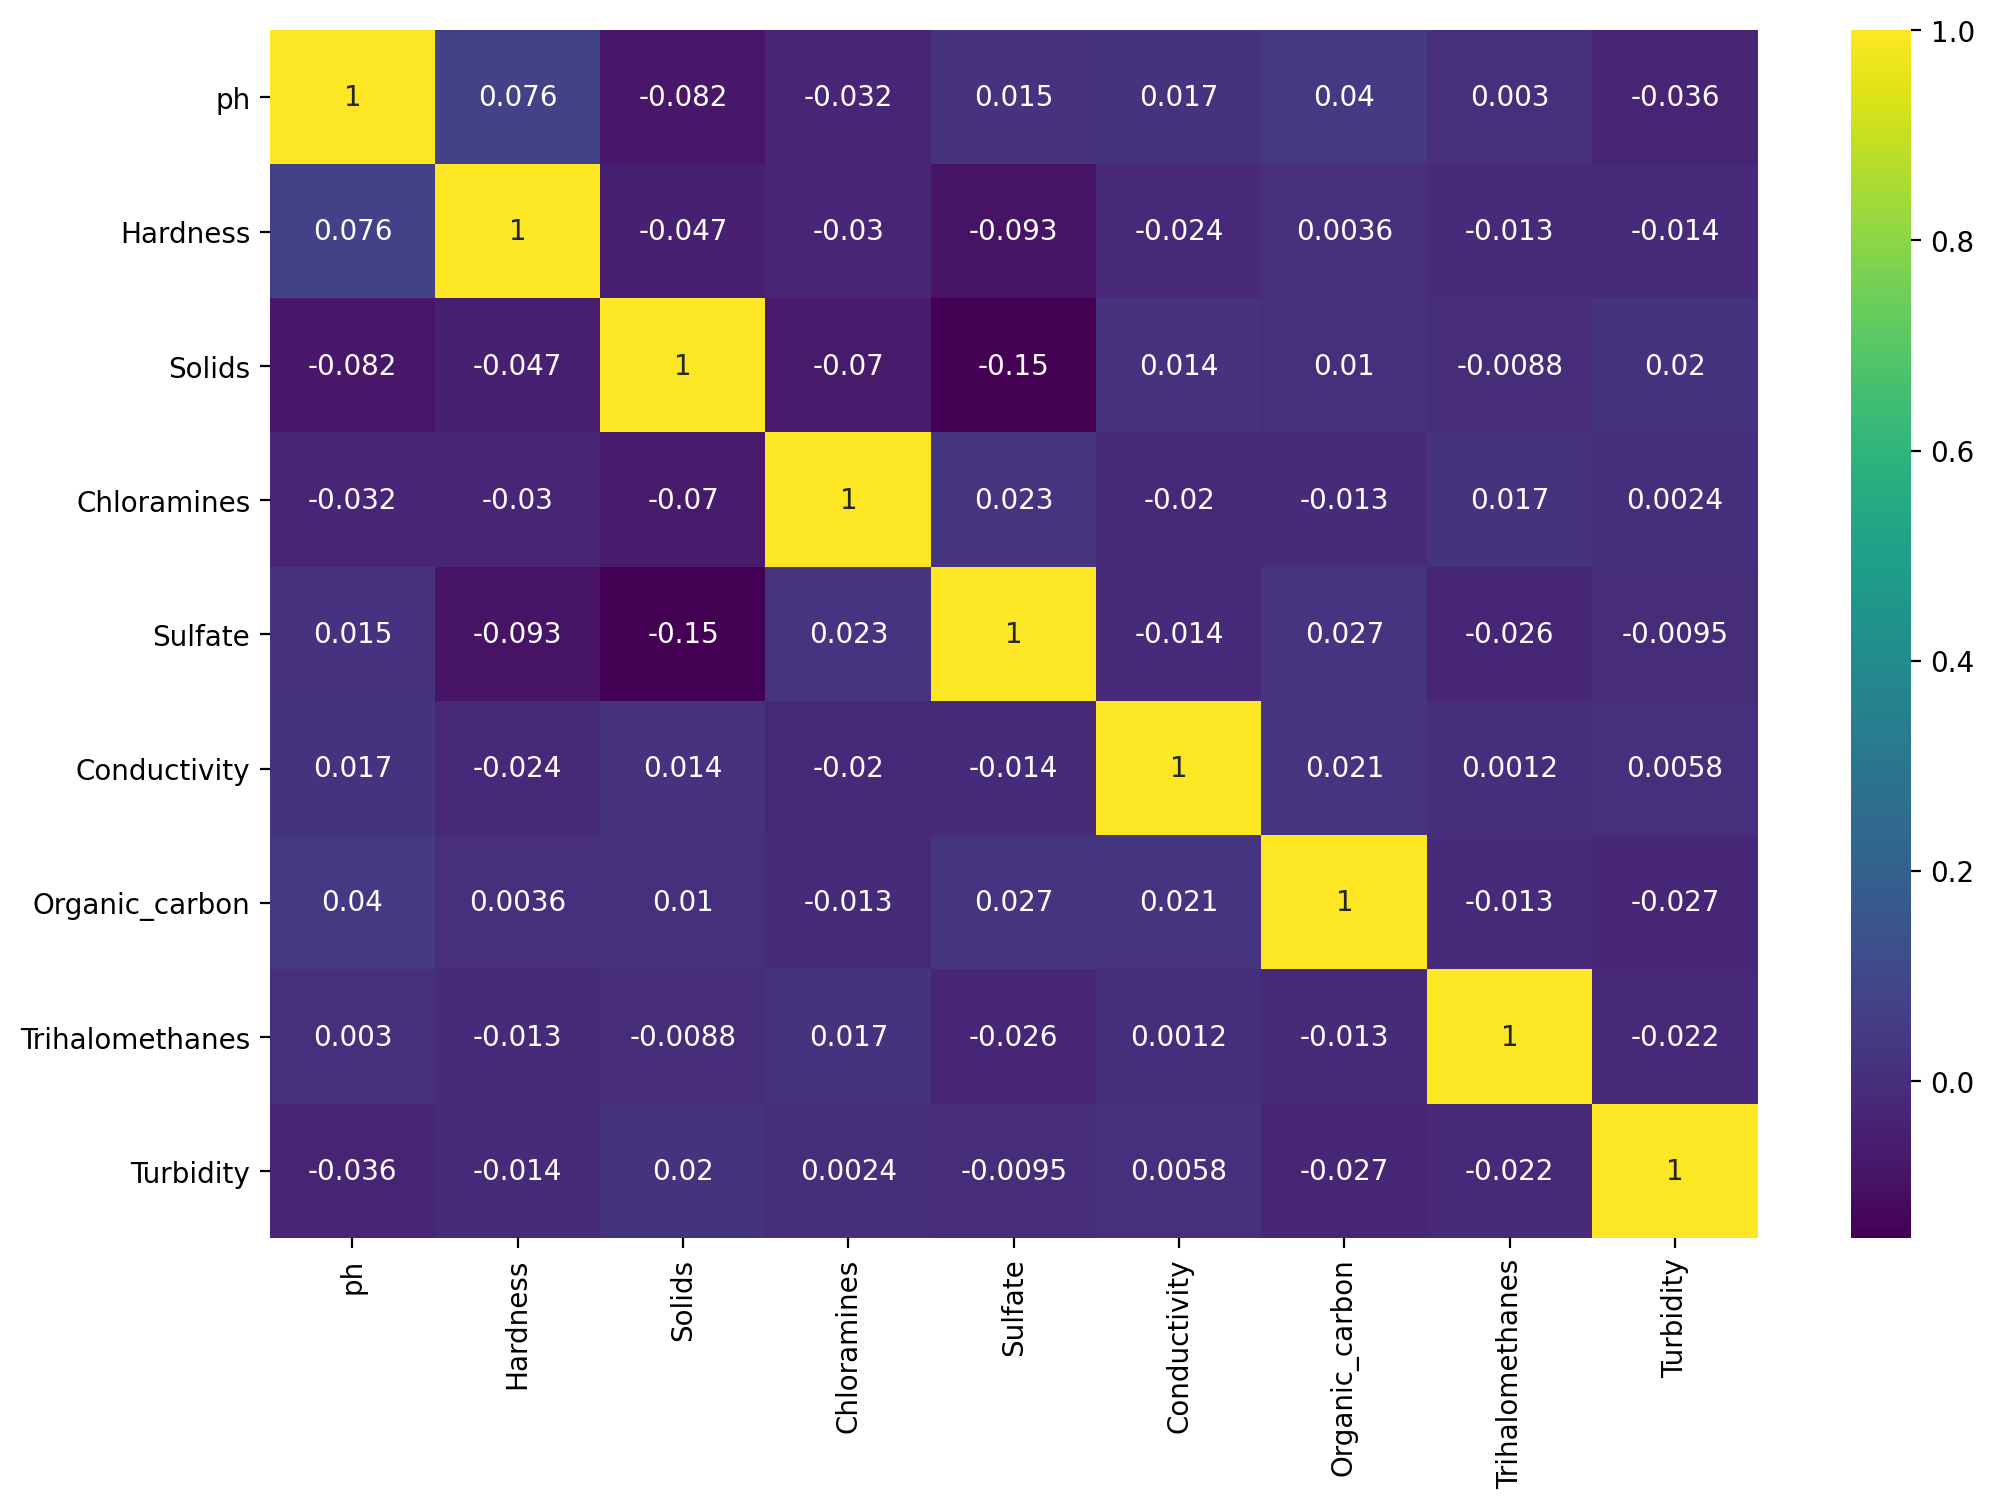

In [62]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='ph', ylabel='Potability'>

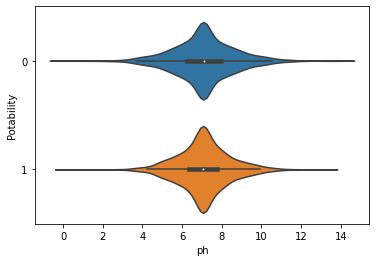

In [63]:
sns.violinplot(x='ph',y='Potability',data=df)

### Boxplot and Kdeplot of different features vs Potability

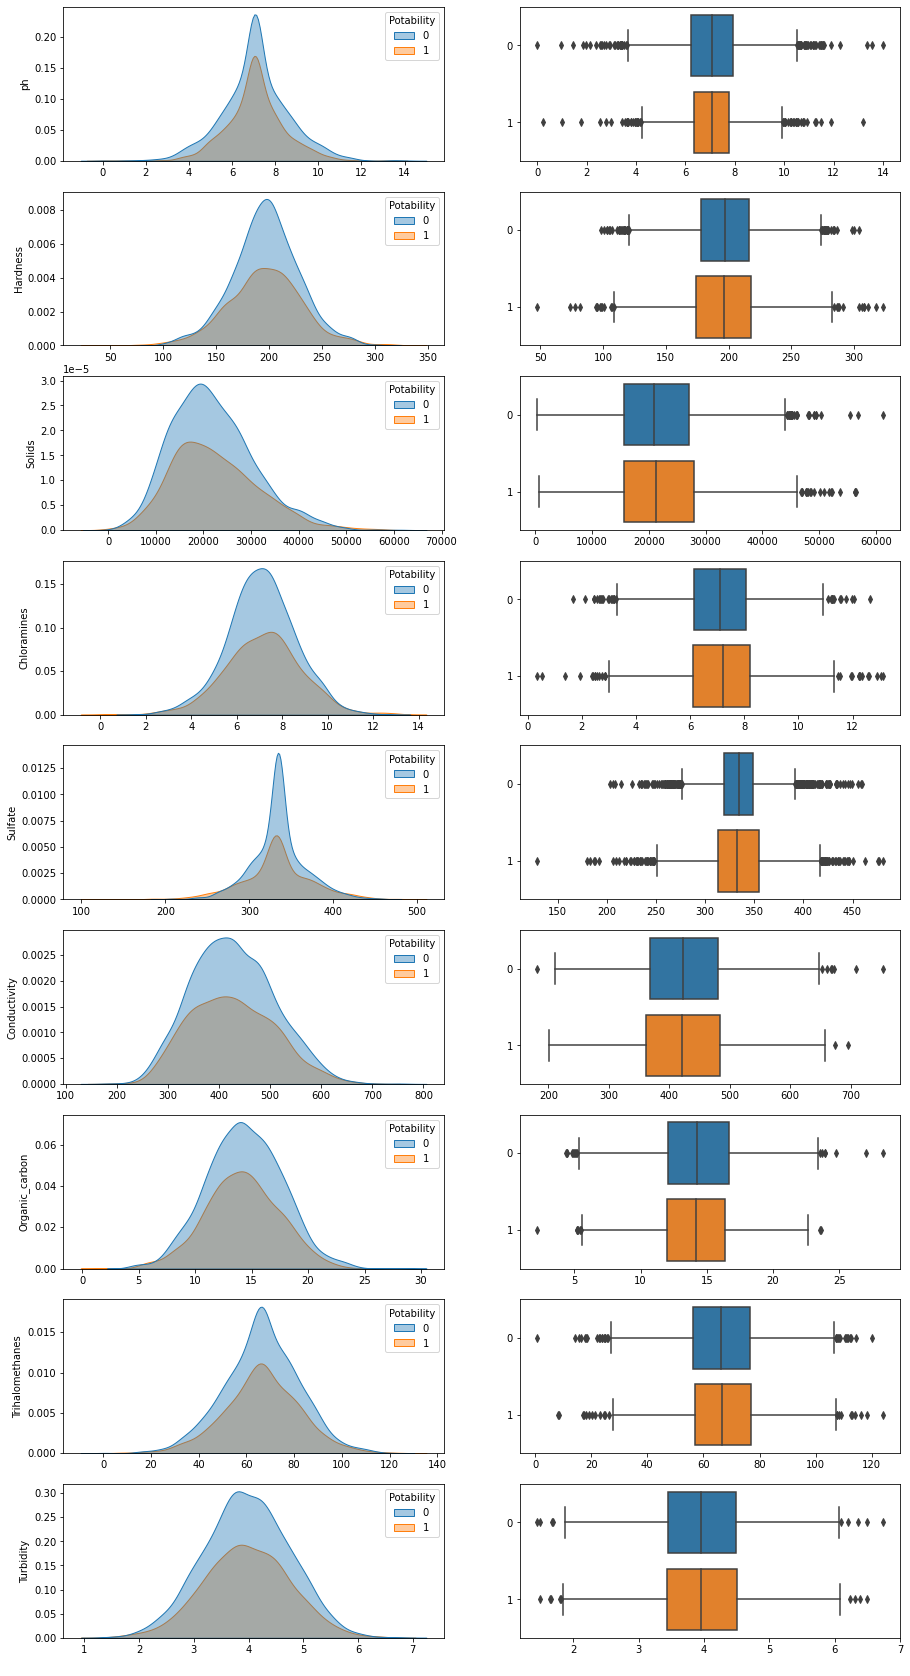

In [69]:
fig,ax=plt.subplots(ncols=2,nrows=9,figsize=(15,30))
features=list(df.columns.drop('Potability'))
i=0
for col in features:
    sns.kdeplot(x=df[col],fill=True,hue=df['Potability'],alpha=0.4,ax=ax[i,0])
    sns.boxplot(x=col,y='Potability',data=df,ax=ax[i,1])
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,0].set_ylabel(col)
    i+=1
plt.show()

<AxesSubplot:xlabel='Potability', ylabel='count'>

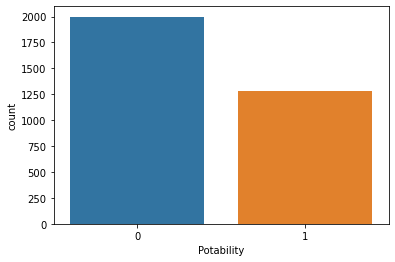

In [72]:
sns.countplot(x='Potability',data=df)

### Can see that class labels are little unbalanced so we'll use SMOTE for training data

# SMOTE

In [70]:
X=df.drop('Potability',axis=1)
y=df['Potability']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [74]:
#Balancing by SMOTE
smt=SMOTE()
X_train,y_train=smt.fit_resample(X_train,y_train)

In [75]:
y_train.value_counts()

0    1395
1    1395
Name: Potability, dtype: int64

Now we can see that the class labels are balanced here

In [76]:
scaler=StandardScaler()

In [77]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [79]:
models=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
train_acc,test_acc=[],[]
kfold=KFold(n_splits=10,random_state=101,shuffle=True)
for model in models:
    trainRes=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kfold)
    train_acc.append(trainRes.mean())
    model.fit(X_train,y_train)
    y_preds=model.predict(X_test)
    testRes=accuracy_score(y_test,y_preds)
    test_acc.append(testRes)

Comparison between different models

In [80]:
modelScore=pd.DataFrame({'model':models,'Train_accuracy':train_acc,'Test_accuracy':test_acc})
modelScore

,model,Train_accuracy,Test_accuracy
0,LogisticRegression(),0.500358,0.521872
1,GaussianNB(),0.554480,0.590031
2,DecisionTreeClassifier(),0.721864,0.711089
3,SVC(),0.663082,0.642930
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.800358,0.755849


Can see that the Random Forest model worked well when compared to other models

Random Forest Classifier Model
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       603
           1       0.66      0.71      0.69       380

    accuracy                           0.75       983
   macro avg       0.73      0.74      0.74       983
weighted avg       0.75      0.75      0.75       983



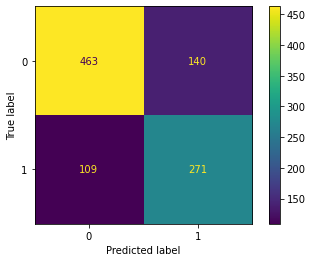

In [82]:
print("Random Forest Classifier Model")
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_rfc=rfc.predict(X_test)
print(classification_report(y_test,y_rfc))
ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test)

# Conclusions

- Random Forest and Decision Tree model were working well when compared to other classification models
- The correlation coefficient between features were very low 